      width < 10: 34706.0
10 <= width < 20: 57250.0
20 <= width < 30: 24885.0
30 <= width < 40: 13338.0
40 <= width < 50: 8011.0
50 <= width     : 20699.0
--------------------------------------------------
       width/height < 0.6: 7720.0
0.6 <= width/height < 0.7: 22966.0
0.7 <= width/height < 0.8: 46997.0
0.8 <= width/height < 0.9: 45458.0
0.9 <= width/height < 1.0: 16786.0
1.0 <= width/height      : 18962.0


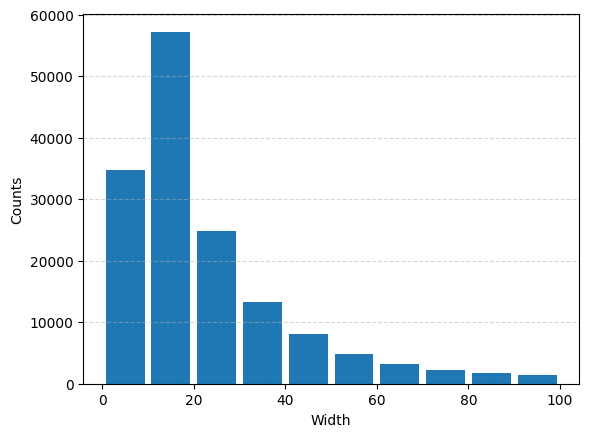

The number of invalid bounding boxes: 535


In [90]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

if __name__ == '__main__':
  anno_file = 'annotation.txt'
  with open(anno_file, 'r') as fp:
    lines = fp.readlines()
  # Enter your code here (25%)
  # You might use the following to access each line
  widths = []
  width_statistics = np.zeros(6)
  width_height_ratio = np.zeros(6)
  invalid_boxes_count = 0
  for line in lines:
    annotation = line.strip().split(' ')
    annotation = list(map(int, annotation[1:]))
    annotation = np.array(annotation).reshape(-1,4)

    valid_boxes = (annotation[:,0] >= 0) & (annotation[:,1] >= 0) & (annotation[:,2] > annotation[:,0]) & (annotation[:,3] > annotation[:,1])
    invalid_boxes = ~valid_boxes
    invalid_boxes_count += invalid_boxes.sum()

    #assert (annotation[:,0] >= 0).all() and (annotation[:,1] >= 0).all() , 'box coordinate error'
    #assert (annotation[:,2] > annotation[:,0]).all() and (annotation[:,3] > annotation[:,1]).all() , 'invalid box'
    annotation = annotation[valid_boxes]

    width = annotation[:, 2] - annotation[:, 0] + 1
    widths.extend(width)
    height = annotation[:, 3] - annotation[:, 1] + 1
    width_height = width/height 
    

    width_statistics += np.array([(width<10).sum(),(width<20).sum() - (width<10).sum(),(width<30).sum() - (width<20).sum(),(width<40).sum() - (width<30).sum(),(width<50).sum() - (width<40).sum(),(width>=50).sum()])
    width_height_ratio += np.array([(width_height<0.6).sum(), (width_height<0.7).sum() - (width_height<0.6).sum(), (width_height<0.8).sum() - (width_height<0.7).sum(), (width_height<0.9).sum() - (width_height<0.8).sum(), (width_height<1.0).sum() - (width_height<0.9).sum(), (width_height>=1.0).sum()])

  



  print("{:>{}}: {}".format("width < 10",       len("10 <= width < 20"), width_statistics[0]))
  print("{:>{}}: {}".format("10 <= width < 20", len("10 <= width < 20"), width_statistics[1]))
  print("{:>{}}: {}".format("20 <= width < 30", len("10 <= width < 20"), width_statistics[2]))
  print("{:>{}}: {}".format("30 <= width < 40", len("10 <= width < 20"), width_statistics[3]))
  print("{:>{}}: {}".format("40 <= width < 50", len("10 <= width < 20"), width_statistics[4]))
  print("{:<{}}: {}".format("50 <= width",      len("10 <= width < 20"), width_statistics[5]))

  print('-'*50)

  print("{:>{}}: {}".format("width/height < 0.6",       len("0.6 <= width/height < 0.7"), width_height_ratio[0]))
  print("{:>{}}: {}".format("0.6 <= width/height < 0.7", len("0.6 <= width/height < 0.7"), width_height_ratio[1]))
  print("{:>{}}: {}".format("0.7 <= width/height < 0.8", len("0.6 <= width/height < 0.7"), width_height_ratio[2]))
  print("{:>{}}: {}".format("0.8 <= width/height < 0.9", len("0.6 <= width/height < 0.7"), width_height_ratio[3]))
  print("{:>{}}: {}".format("0.9 <= width/height < 1.0", len("0.6 <= width/height < 0.7"), width_height_ratio[4]))
  print("{:<{}}: {}".format("1.0 <= width/height",      len("0.6 <= width/height < 0.7"), width_height_ratio[5]))


  plt.hist(widths, range(0, 101, 10), rwidth=0.85)
  plt.xlabel('Width')
  plt.ylabel('Counts')
  plt.grid(axis='y', linestyle='--', alpha=0.5)
  plt.show()
  
  print("The number of invalid bounding boxes:",invalid_boxes_count)

In [10]:
# Step 2b.5: In Step 2b.1, we only consider valid bounding boxes. How many bounding boxes are invalid? Modify the above code to find the answer. (5%)
# Write down your answer here.

1. 有 535 個 invalid bounding boxes
2. 我是利用numpy中的布林數值遮罩去求取 valid bounding boxes 的，因此為了求出 invalid bounding boxes 我只需對 valid bounding boxes 取反遮罩，再利用 numpy 中的 sum() 函數去求和，並累加成最後總數